In [2]:
#Installing and importing all libraries
!pip install html5lib webdriver-manager python-bcb pandas-datareader
!pip install mplfinance selenium FPDF mplcyberpunk python-dotenv pywin32

import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime
from datetime import timedelta
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import mplcyberpunk
import time
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from webdriver_manager.firefox import GeckoDriverManager
import requests
from bcb import currency
from bcb import sgs
from fpdf import FPDF
from matplotlib.dates import date2num
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Getting Ibovespa e S&P500 infos

In [6]:
# Getting Ibovespa e S&P500 in yahoo finances

#These indexes are the default in the yahoo finances, if you want to get different infos, just put the index
indexes = ['^BVSP', '^GSPC']

today = datetime.now()
last_year = today - timedelta(days=366)

#pdr - pandas_datareader is the library to get automatically the infos from different sources
market_data = pdr.get_data_yahoo(indexes, start=last_year, end = today)

display(market_data)

Attributes      Adj Close                       Close               \
Symbols             ^BVSP        ^GSPC          ^BVSP        ^GSPC   
Date                                                                 
2021-10-18  114428.000000  4486.459961  114428.000000  4486.459961   
2021-10-19  110673.000000  4519.629883  110673.000000  4519.629883   
2021-10-20  110786.000000  4536.189941  110786.000000  4536.189941   
2021-10-21  107735.000000  4549.779785  107735.000000  4549.779785   
2021-10-22  106296.000000  4544.899902  106296.000000  4544.899902   
...                   ...          ...            ...          ...   
2022-10-12            NaN  3577.030029            NaN  3577.030029   
2022-10-13  114300.000000  3669.909912  114300.000000  3669.909912   
2022-10-14  112072.000000  3583.070068  112072.000000  3583.070068   
2022-10-17  113624.000000  3677.949951  113624.000000  3677.949951   
2022-10-18  115743.070312  3719.979980  115743.070312  3719.979980   

Attributes           High                         Low               \
Symbols             ^BVSP        ^GSPC          ^BVSP        ^GSPC   
Date                                                                 
2021-10-18  114927.000000  4488.750000  112841.000000  4447.470215   
2021-10-19  114422.000000  4520.399902  109947.000000  4496.410156   
2021-10-20  112023.000000  4540.870117  110176.000000  4524.399902   
2021-10-21  110767.000000  4551.439941  105714.000000  4526.890137   
2021-10-22  107749.000000  4559.669922  102854.000000  4524.000000   
...                   ...          ...            ...          ...   
2022-10-12            NaN  3608.340088            NaN  3573.860107   
2022-10-13  115367.000000  3685.409912  112690.000000  3491.580078   
2022-10-14  114712.000000  3712.000000  111631.000000  3579.679932   
2022-10-17  114406.000000  3689.729980  112090.000000  3638.649902   
2022-10-18  115795.046875  3762.790039  113626.632812  3686.530029   

Attributes           Open                   Volume                
Symbols             ^BVSP        ^GSPC       ^BVSP         ^GSPC  
Date                                                              
2021-10-18  114647.000000  4463.720215  11201300.0  2.683540e+09  
2021-10-19  114422.000000  4497.339844  14129200.0  2.531210e+09  
2021-10-20  110677.000000  4524.419922  11735800.0  2.671560e+09  
2021-10-21  110767.000000  4532.240234  16507700.0  3.016950e+09  
2021-10-22  107714.000000  4546.120117  21165700.0  3.062810e+09  
...                   ...          ...         ...           ...  
2022-10-12            NaN  3590.830078         NaN  4.006830e+09  
2022-10-13  114819.000000  3520.370117  14583700.0  5.021680e+09  
2022-10-14  114301.000000  3690.409912  13096100.0  4.243030e+09  
2022-10-17  112107.000000  3638.649902  11633000.0  4.352780e+09  
2022-10-18  113626.632812  3746.260010         0.0  2.663739e+09  

[260 rows x 12 columns]

In [7]:
# Get the closing on each asset

closing_data = market_data['Adj Close']
closing_data.columns = ['Ibov','S&P500']

# In holidays doesn't have negotiations here in Brazil, so will not have values, we need to remove these NaNs
closing_data = closing_data.dropna()

display(closing_data)

,Ibov,S&P500
Date,,
2021-10-18,114428.000000,4486.459961
2021-10-19,110673.000000,4519.629883
2021-10-20,110786.000000,4536.189941
2021-10-21,107735.000000,4549.779785
2021-10-22,106296.000000,4544.899902
...,...,...
2022-10-11,114827.000000,3588.840088
2022-10-13,114300.000000,3669.909912
2022-10-14,112072.000000,3583.070068


In [10]:
# Getting the monthly and yearly closing to calculate profitability

# Resample -> Will get a portion of your data and make a object with him, you can sum, get the last values, etc
# Last -> Will get the last value from a list, in your case, the last value on each year
year_data = closing_data.resample("Y").last()
display(year_data)

month_data = closing_data.resample("M").last()
display(month_data)

,Ibov,S&P500
Date,,
2021-12-31,104822.000000,4778.72998
2022-12-31,115743.070312,3719.97998


,Ibov,S&P500
Date,,
2021-10-31,103501.000000,4605.379883
2021-11-30,101915.000000,4567.000000
2021-12-31,104822.000000,4778.729980
2022-01-31,112388.000000,4515.549805
2022-02-28,113142.000000,4384.649902
2022-03-31,119999.000000,4530.410156
2022-04-30,107876.000000,4131.930176
2022-05-31,111351.000000,4132.149902
2022-06-30,98542.000000,3785.379883


In [13]:
# Calculating the profitabality

#Pct_change -> get the percentage change from the immediately previous row by default
diary_return = closing_data.pct_change().dropna()
display(diary_return)

month_month_return = month_data.pct_change().dropna()

# Here we are removing some data to improve the graph view, and don't get small values in the plot. So we will remove the first row in the df
month_month_return = month_month_return.iloc[1:, :]
display(month_month_return)

year_return = year_data.pct_change().dropna()
display(year_return)

,Ibov,S&P500
Date,,
2021-10-19,-0.032815,0.007393
2021-10-20,0.001021,0.003664
2021-10-21,-0.027540,0.002996
2021-10-22,-0.013357,-0.001073
2021-10-25,0.022757,0.004748
...,...,...
2022-10-11,-0.009608,-0.006519
2022-10-13,-0.004590,0.022589
2022-10-14,-0.019493,-0.023663


,Ibov,S&P500
Date,,
2021-12-31,0.028524,0.046361
2022-01-31,0.072180,-0.055073
2022-02-28,0.006709,-0.028989
2022-03-31,0.060605,0.033243
2022-04-30,-0.101026,-0.087957
2022-05-31,0.032213,0.000053
2022-06-30,-0.115033,-0.083920
2022-07-31,0.046914,0.091116
2022-08-31,0.061629,-0.042440


,Ibov,S&P500
Date,,
2022-12-31,0.104187,-0.221555


In [14]:
# Getting the day closing

day_closing = diary_return.iloc[-1, :]
display(day_closing)

Ibov      0.018650
S&P500    0.011428
Name: 2022-10-18 00:00:00, dtype: float64

In [17]:
# Calculating the volatility

#Volatility is the standard deviation (desvio padrão) from asset
volatility_12months_ibov = diary_return['Ibov'].std() * np.sqrt(252)
volatility_12months_sp = diary_return['S&P500'].std() * np.sqrt(252)

display(volatility_12months_ibov, volatility_12months_sp)

0.2061313741850956

0.2312303912948357

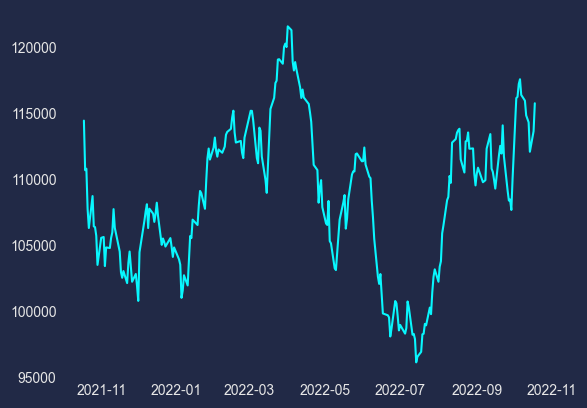

In [22]:
# Plot the Ibov graph
fig, ax = plt.subplots()

plt.style.use('cyberpunk')

#closing_data.index are the dates (indexes from our values)
ax.plot(closing_data.index, closing_data['Ibov'])
ax.grid(False)

#Dpi = 300 -> The best quality of image export
plt.savefig('./images/ibov.png', dpi=300)
plt.show()

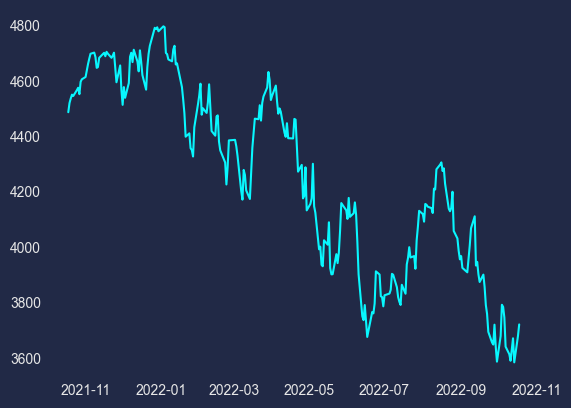

In [23]:
# Plot the S&P500 graph
fig, ax = plt.subplots()

plt.style.use('cyberpunk')

#closing_data.index are the dates (indexes from our values)
ax.plot(closing_data.index, closing_data['S&P500'])
ax.grid(False)

plt.savefig('./images/s&p500.png', dpi=300)
plt.show()

# Getting DI infos (taxa básico de juros - basic interest rate)

In [25]:
## Getting the util days 

#We are getting the first day
initial_date = closing_data.index[0]

# If the time that the script is running is after the 10 AM, the values got in yahoo finance will not be the closing info but the running info
if datetime.now().hour < 10:
    final_date = closing_data.index[-1]
else:
    final_date = closing_data.index[-2]

#Formating data in dd/mm/yy pattern 
initial_date = initial_date.strftime("%d/%m/%Y")
final_date = final_date.strftime("%d/%m/%Y")

display(initial_date, final_date)

'18/10/2021'

'17/10/2022'

In [27]:
# Preparing the URLs to make the web scraping 

actual_url = f'''https://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data={final_date}&Mercadoria=DI1'''

older_url = f'''https://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data={initial_date}&Mercadoria=DI1'''


'https://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/SistemaPregao1.asp?pagetype=pop&caminho=Resumo%20Estat%EDstico%20-%20Sistema%20Preg%E3o&Data=18/10/2021&Mercadoria=DI1'

In [41]:
# Making the web scraping
def getting_di_data(url):

    #Working with brave browser
    options = webdriver.ChromeOptions()
    options.binary_location = "C:/Program Files/BraveSoftware/Brave-Browser/Application/brave.exe"
    driver = webdriver.Chrome(executable_path="C:/Users/josea/Documents-C/BOT.Camp/chromedriver.exe", chrome_options= options)

    #Thats the default way, but with bave browser not work
    #driver = webdriver.Firefox(service=Service(GeckoDriverManager().install()))
    
    without_connection = True
    
    cont = 0
    while without_connection and cont<4:
        try:
            driver.get(url)
            without_connection = False
        except:
            cont += 1
            pass
    
    if without_connection: return None,None
            
    #Here we will get all tabel from the site
    local_tabel = '''
    //div[@id = "containerPop"]//div[@id = "pageContent"]//form//table//tbody//tr[3]//td[3]//table
    '''

    #Here we will get the index from the site
    local_index = '''
    //div[@id = "containerPop"]//div[@id = "pageContent"]//form//table//tbody//tr[3]//td[1]//table
    '''

    #Getting the xpath from the selected part of the site
    tabel_element = driver.find_element("xpath", local_tabel)
    index_element = driver.find_element("xpath", local_index)

    tabel_html = tabel_element.get_attribute('outerHTML')
    index_html = index_element.get_attribute('outerHTML')

    driver.quit()

    tabel = pd.read_html(tabel_html)[0]
    index = pd.read_html(index_html)[0]

    return tabel, index

more_recently_di_tabel, more_recently_di_index = getting_di_data(url = actual_url)

more_older_di_tabel, more_older_di_index = getting_di_data(url = older_url)

if more_recently_di_tabel.empty: raise

In [45]:
# Handling DI data
def handling_di_data(df_data, index):
    #Making the first line as the column names
    df_data.columns = df_data.loc[0]

    #Select the closing prices
    df_data = df_data['ÚLT. PREÇO']

    # Removing the first line that we say is the column name
    df_data = df_data.drop(0, axis = 0)

    #Making the first line as the column names
    index.columns = index.loc[0]

    #Select the DI indexes
    index_di = index['VENCTO']

    # Removing the first line that we say is the column name
    index = index.drop(0, axis = 0)
    
    # Setting the row index to the main data df
    df_data.index = index['VENCTO']
    
    #print(df_data)
    
    #Transforming all values as integer
    df_data = df_data.astype(int)

    # Removing all zero values
    df_data = df_data[df_data != 0]

    #Transforming the values as decimals
    df_data = df_data/1000
    
    #print(df_data)

    return df_data

recent_di_processed_data = handling_di_data(more_recently_di_tabel, more_recently_di_index)

older_di_processed_data = handling_di_data(more_older_di_tabel, more_older_di_index)


In [47]:
# Transforming the letter indexes in data
subtitle = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    index = ['F', 'G', 'H', 'J', 'K', 'M', 'N', 'Q', 'U', 'V', 'X', 'Z'])

def converting_codes_in_data(df):

    data_list = []

    for index in df.index:

        letter = index[0]
        year = index[1:3]

        mes = subtitle[letter]

        data = f"{mes}-{year}"

        data = datetime.strptime(data, "%b-%y")

        data_list.append(data)
        

    df.index = data_list  
    
    return df

recent_di_processed_data = converting_codes_in_data(recent_di_processed_data)
older_di_processed_data = converting_codes_in_data(older_di_processed_data)

recent_di_processed_data

2022-11-01    13.654
2022-12-01    13.664
2023-01-01    13.678
2023-02-01    13.695
2023-03-01    13.700
2023-04-01    13.690
2023-05-01    13.660
2023-06-01    13.645
2023-07-01    13.550
2023-08-01    13.430
2023-09-01    13.350
2023-10-01    13.210
2024-01-01    12.840
2024-04-01    12.500
2024-07-01    12.140
2024-10-01    11.870
2025-01-01    11.645
2025-04-01    11.530
2025-07-01    11.490
2025-10-01    11.480
2026-01-01    11.490
2026-04-01    11.495
2026-07-01    11.500
2026-10-01    11.500
2027-01-01    11.490
2027-04-01    11.515
2027-07-01    11.525
2027-10-01    11.535
2028-01-01    11.540
2029-01-01    11.630
2030-01-01    11.680
2031-01-01    11.720
2032-01-01    11.720
2033-01-01    11.750
Name: ÚLT. PREÇO, dtype: float64

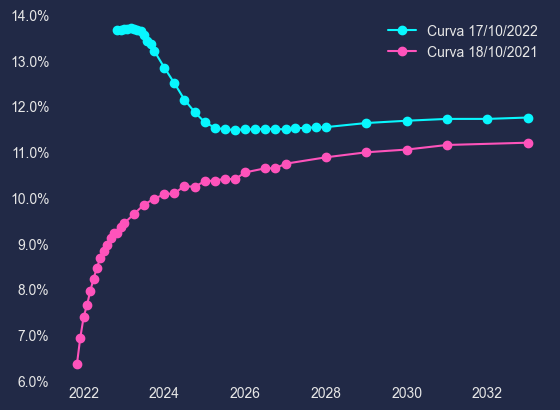

In [49]:
#Plot the DI graph

fig, ax = plt.subplots()
plt.style.use('cyberpunk')
#ax.set_ylim(3.5,15)

ax.plot(recent_di_processed_data.index, recent_di_processed_data.values, 
                                    label = f"Curva {final_date}", marker='o')
ax.plot(older_di_processed_data.index, older_di_processed_data.values, 
        label = f"Curva {initial_date}", marker='o')

#Set the y Axis as percentage measurement
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
ax.grid(False)

#Dpi = 300 -> The best quality of image export
plt.savefig('./images/DI.png', dpi=300)
plt.show()


# Getting Selic, inflation and U$

In [112]:
# Getting Selic with library
# The selic: 432 can be found in these URL #https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
# In Pesquisa textual you can put 'selic' and press Enter, will return all codes that matches with your search

selic = sgs.get({'selic':432}, start = '2010-01-01')

selic

,selic
Date,
2010-01-01,8.75
2010-01-02,8.75
2010-01-03,8.75
2010-01-04,8.75
2010-01-05,8.75
...,...
2022-10-14,13.75
2022-10-15,13.75
2022-10-16,13.75


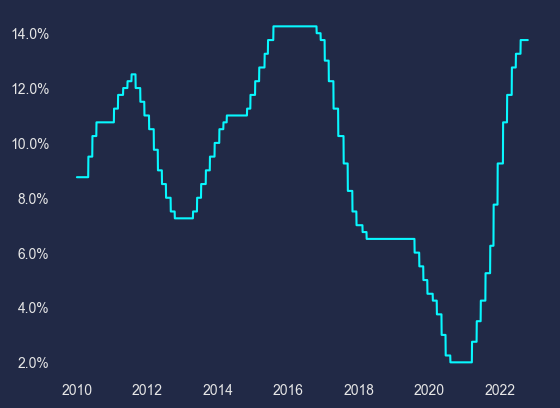

In [113]:
# Plotting Selic data

fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(selic.index, selic['selic'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(False)
plt.savefig('./images/selic.png', dpi = 300)

plt.show()

In [114]:
# Getting IPCA and IGPM

inflation = sgs.get(
    {'ipca': 433,'igp-m': 189}, 
    start = last_year + timedelta(180)
)

inflation

,ipca,igp-m
Date,,
2022-04-01,1.06,1.41
2022-05-01,0.47,0.52
2022-06-01,0.67,0.59
2022-07-01,-0.68,0.21
2022-08-01,-0.36,-0.70
2022-09-01,-0.29,-0.95


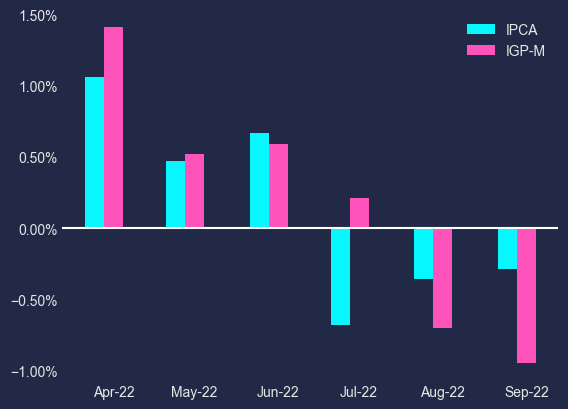

In [115]:
# Plotting IPCA and IGPM

# Transforming all dates in number, if we doesn't do this, we can't avoid one bar above the other
numeric_data = date2num(inflation.index)

fig, ax = plt.subplots()

# The -7 is to avoid one bar to be plot above the other
ax.bar(numeric_data-7, inflation['ipca'], label = "IPCA", width=7)
ax.bar(numeric_data, inflation['igp-m'], label = "IGP-M", width=7)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)
ax.grid(False)
plt.axhline(y=0, color = 'w')
plt.legend()
plt.savefig('./images/inflation.png', dpi = 300)

plt.show()

In [116]:
# Get the U$

dolar = currency.get('USD', start=last_year, end=datetime.now())
dolar

,USD
Date,
2021-10-18,5.5193
2021-10-19,5.5521
2021-10-20,5.5571
2021-10-21,5.6423
2021-10-22,5.7117
...,...
2022-10-11,5.2068
2022-10-13,5.3017
2022-10-14,5.2824


In [117]:
# Getting the monthly and yearly dolar value

# Resample -> Will get a portion of your data and make a object with him, you can sum, get the last values, etc
# Last -> Will get the last value from a list, in your case, the last value on each year
monthly_dolar = dolar.resample("M").last()
yearly_dolar = dolar.resample("Y").last()

In [118]:
# Calculating rentability

#Pct_change -> get the percentage change from the immediately previous row by default
diary_dolar = dolar.pct_change().dropna()
daily_closing_dolar = diary_dolar.iloc[-1, :]

month_month_dolar_return = monthly_dolar.pct_change().dropna()

# Here we are removing some data to improve the graph view, and don't get small values in the plot. So we will remove the first row in the df
month_month_dolar_return = month_month_dolar_return.iloc[1: , :]

year_return_dolar = yearly_dolar.pct_change().dropna()

In [119]:
# Calculating volatility 

volatility_12m_dolar = diary_dolar['USD'].std() * np.sqrt(252)
volatility_12m_dolar

0.1485556666000172

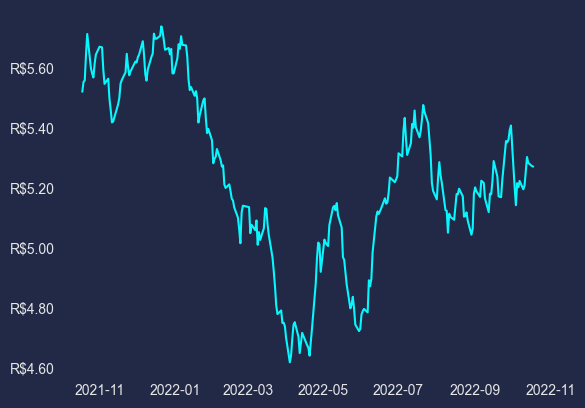

In [120]:
# Plotting U$ 
fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(dolar.index, dolar['USD'])
ax.yaxis.set_major_formatter('R${x:1.2f}')
ax.grid(False)
plt.savefig('./images/dolar.png', dpi = 300)

plt.show()

# Creating PDF

In [133]:
# Get the months

months = []

for indice in month_month_return.index:

    month = indice.strftime("%b")
    
    months.append(month)
    
months

['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

In [134]:
# Creating the class PDF
class PDF(FPDF):
    
    def header(self):
        #Setting the logo image and the dimensions in mm
        self.image('./images/logo.png', 10, 8, 40)

        # Setting the font in header, B = Bold
        self.set_font('Arial', 'B', 20)

        #Space between the logo and the next cell
        self.ln(15)

        #Set the color to the tabel border and lines
        self.set_draw_color(35, 155, 132) #cor RGB
        self.cell(15, ln = False)
        self.cell(150, 15, f"Market Report {final_date}", 
                  border = True, ln = True, align = "C")
        self.ln(5)
        
    def footer(self):
        
        self.set_y(-15) #Space until the final pixel in the page
        self.set_font('Arial', 'I', 10)
        self.cell(0, 10, f"{self.page_no()}/{{nb}}", align = "C")

In [135]:
# Setting the initial PDF configs

#mm -> our scale
pdf = PDF("P", "mm", "Letter")
pdf.set_auto_page_break(auto = True, margin = 15)

#Enable a function to count the page number
pdf.alias_nb_pages()

# Added a new page
pdf.add_page()
pdf.set_fill_color(255, 255, 255)
pdf.set_draw_color(35, 155, 132)

#pdf.output('aula2.pdf')

In [136]:
#Creating the first infos in the page 

# Putting an image
pdf.image('./images/nave1.png', x = 115, y = 70, w = 75, h = 33)

# Creating the first title
pdf.set_font('Arial', 'B', 18)
pdf.cell(0, 10, "1 - Ações e câmbio", ln = True,  border = False, fill = False)
pdf.ln(2)

# Creating the secondary title
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "1.1 Fechamento do mercado", ln = True,  border = False, fill = True)

pdf.ln(7)

In [137]:
# Putting Ibovespa S&P500 and U$ in PDF

#Ibovespa
pdf.set_font('Arial', '', 13)
pdf.cell(25, 15, " Ibovespa", ln = False,  border = True, fill = True)
pdf.cell(20, 15, f" {str(round(day_closing[0] * 100, 2))}%", ln = True, 
         border = True, fill = False)

#s&p500
pdf.cell(25, 15, " S&P500", ln = False,  border = True, fill = True)
pdf.cell(20, 15, f" {str(round(day_closing[1] * 100, 2))}%", ln = True,  border = True, fill = False)

#U$
pdf.cell(25, 15, " Dólar", ln = False,  border = True, fill = True)
pdf.cell(20, 15, f" {str(round(daily_closing_dolar[0] * 100, 2))}%", ln = True,  border = True, fill = False)

pdf.ln(7)


In [138]:
# Putting plots in PDF

#imagens
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.2 Graphs Ibovespa, S&P500 and Dolar", ln = True,  border = False, fill = False)

pdf.cell(95, 15, "Ibovespa", ln = False,  border = False, fill = False, align = "C")
pdf.cell(100, 15, "S&P500", ln = True,  border = False, fill = False, align = "C")
pdf.image("./images/ibov.png", w = 80, h = 70, x = 20, y = 160)
pdf.image("./images/s&p500.png", w = 80, h = 70, x = 115, y = 160)

pdf.ln(130)

pdf.cell(0, 15, "Dólar", ln = True,  border = False, fill = False, align = "C")
pdf.image("./images/dolar.png", w = 100, h = 75, x = 58)


pdf.ln(2)

In [139]:
# Putting rentability month a month

pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.3 Rentability month-month", ln = True,  border = False, fill = False)

#Writing the months
pdf.cell(17, 10, "", ln = False,  border = False, fill = True, align = "C")

for month in months:
    
    pdf.cell(16, 10, month, ln = False,  border = True, fill = True, align = "C")


pdf.ln(10)

#pdf.output('aula2.pdf')

In [140]:
#Rentability to Ibovespa, S&P and Dolar

#Ibovespa
pdf.cell(17, 10, "Ibov", ln = False,  border = True, fill = True, align = "C")
pdf.set_font('Arial', '', 12)
for rent in month_month_return['Ibov']:
    pdf.cell(16, 10, f" {str(round(rent * 100, 2))}%", ln = False,  border = True, align = "C")
pdf.ln(10)

#S&P
pdf.cell(17, 10, "S&P500", ln = False,  border = True, fill = True, align = "C")
pdf.set_font('Arial', '', 12)
for rent in month_month_return['S&P500']:
    pdf.cell(16, 10, f" {str(round(rent * 100, 2))}%", ln = False,  border = True, align = "C")
pdf.ln(10)

#Dolar
pdf.cell(17, 10, "Dólar", ln = False,  border = True, fill = True, align = "C")
pdf.set_font('Arial', '', 12)
for rent in month_month_dolar_return['USD']:
    pdf.cell(16, 10, f" {str(round(rent * 100, 2))}%", ln = False,  border = True, align = "C")
pdf.ln(10)

#pdf.output('aula2.pdf')

In [141]:
#Annual profitability

pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.4 Annual profitability", ln = True,  border = False, fill = False)

#prof annual ibov
pdf.set_font('Arial', '', 13)
pdf.cell(25, 10, "Ibovespa", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(year_return.iloc[0, 0] * 100, 2))}%", ln = True,  border = True, align = "C")

#prof annual S&P
pdf.cell(25, 10, "S&P500", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(year_return.iloc[0, 1] * 100, 2))}%", ln = True,  border = True, align = "C")

#prof annual Dólar
pdf.cell(25, 10, "Dolar", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(year_return_dolar.iloc[0, 0] * 100, 2))}%", ln = True,  border = True, align = "C")
pdf.ln(20)

In [142]:
# Volatility
pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "   1.5 Volatility 12M", ln = True,  border = False, fill = False)

#vol ibov
pdf.set_font('Arial', '', 13)
pdf.cell(25, 10, "Ibovespa", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(volatility_12months_ibov * 100, 2))}%", ln = True,  border = True, align = "C")

#vol s&p500
pdf.cell(25, 10, "S&P500", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(volatility_12months_sp * 100, 2))}%", ln = True,  border = True, align = "C")

#vol dolar
pdf.cell(25, 10, "Dólar", ln = False,  border = True, fill = True, align = "C")
pdf.cell(20, 10, f" {str(round(volatility_12m_dolar * 100, 2))}%", ln = True,  border = True, align = "C")

pdf.ln(7)


In [143]:
# Putting IGPM and IPCA and closing PDF

pdf.set_font('Arial', 'B', 18)
pdf.cell(0, 15, "2 - Economic Data", ln = True,  border = False, fill = False)

pdf.set_font('Arial', '', 14)
pdf.cell(0, 15, "2.1 Curva de juros", ln = True,  border = False, fill = False)
pdf.image("./images/DI.png", w = 125, h = 100, x = 40, y = 140)

pdf.ln(135)

pdf.cell(0, 15, "2.2 Inflation", ln = True,  border = False, fill = False)
pdf.image("./images/inflation.png", w = 110, h = 90, x = 40)


pdf.cell(0, 15, "2.3 Selic", ln = True,  border = False, fill = False)
pdf.image("./images/selic.png", w = 110, h = 90, x = 40)

pdf.output('aula2.pdf')

''

# Sending Report via e-mail

In [144]:
#Installing and importing the library needed
!pip install pywin32

import win32com.client as win32


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [145]:
#Integration with outlook

outlook = win32.Dispatch('outlook.application')

In [146]:
#Creating and sending the e-mail

email = outlook.CreateItem(0)

email.To = "botcamp@edufinance.com.br"
email.Subject = "Daily Report"
email.Body = '''Segue em anexo o relatório diário.

Abs, Zézão

'''

anexo = "./aula2.pdf"

email.Attachments.Add(anexo)

email.Send()

com_error: (-2147352567, 'Exceção.', (4096, 'Microsoft Outlook', 'Não é possível criar a mensagem de email porque um arquivo de dados para o envio e o recebimento de mensagens não foi encontrado. Verifique suas configurações neste perfil do Microsoft Outlook. No Microsoft Windows, clique no botão Iniciar e no Painel de Controle. Clique em Contas de Usuário e em Email. Clique em Mostrar Perfis, selecione este perfil e clique em Propriedades.', None, 0, -2147221233), None)